In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 1000)      # or None for no limit
pd.set_option('display.max_columns', 1000)

In [ ]:
%%html
<style>
  .output_wrapper, .output {
    max-width: 100% !important;
  }
  .container {
    width: 100% !important;
  }
</style>

In [ ]:
import geopandas as gpd

gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/MoData/shapes/USCASJ/basin_shape_geog.shp")
gdf['geometry'].centroid

<ipython-input-4-e88e54614819>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry'].centroid


0    POINT (-119.17706 37.3545)
dtype: geometry

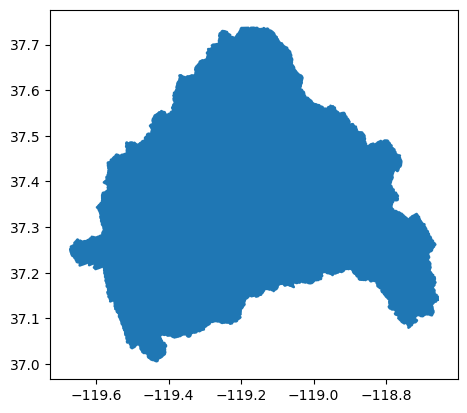

In [ ]:
gdf.plot();

In [ ]:
!pip install contextily folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 93.9 MB/s eta 0:00:00


EPSG:4326


<ipython-input-8-fdaba49f8ef4>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


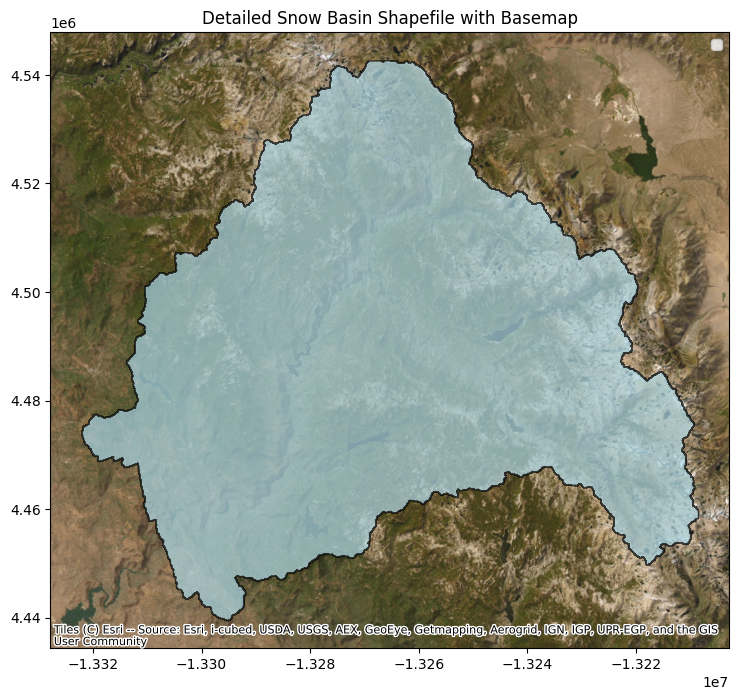

In [ ]:
# Lets create a map
import contextily as ctx
import matplotlib.pyplot as plt

print(gdf.crs)  # Need to get the current crs

if gdf.crs is None or gdf.crs.to_string() != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, facecolor="lightblue", edgecolor="black", alpha=0.7, linewidth=1)

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, alpha=0.9)

ax.set_title("Detailed Snow Basin Shapefile with Basemap")
ax.legend()
plt.show()


In [ ]:
basin_shp_path = "/content/drive/MyDrive/Colab Notebooks/MoData/shapes/USCASJ/basin_shape_geog.shp"
basin_gdf = gpd.read_file(basin_shp_path)

obs_shp_path = "/content/drive/MyDrive/Colab Notebooks/MoData/insitu/USCASJ/qa/insitu_obs.shp"
obs_gdf = gpd.read_file(obs_shp_path)


In [ ]:
obs_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        8 non-null      object  
 1   id          8 non-null      object  
 2   network     8 non-null      object  
 3   elevation_  8 non-null      float64 
 4   latitude    8 non-null      float64 
 5   longitude   8 non-null      float64 
 6   geometry    8 non-null      geometry
dtypes: float64(3), geometry(1), object(3)
memory usage: 580.0+ bytes


In [211]:
obs_gdf.pillow.value_counts()

pillow
LLE    4215
SPA    4215
LMS    4215
GNL    4208
DAN    4152
Name: count, dtype: int64

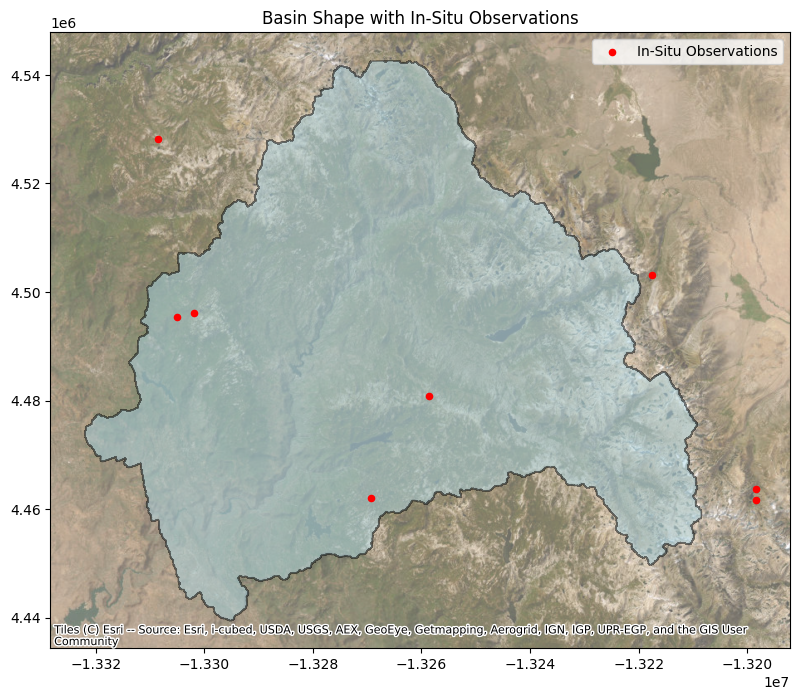

In [ ]:
if basin_gdf.crs is None or basin_gdf.crs.to_string() != "EPSG:4326":
    basin_gdf = basin_gdf.to_crs(epsg=4326)
if obs_gdf.crs is None or obs_gdf.crs.to_string() != "EPSG:4326":
    obs_gdf = obs_gdf.to_crs(epsg=4326)

# Convert both datasets to Web Mercator (EPSG:3857)
basin_gdf = basin_gdf.to_crs(epsg=3857)
obs_gdf = obs_gdf.to_crs(epsg=3857)

# Plot the basin polygons
fig, ax = plt.subplots(figsize=(12, 8))
basin_gdf.plot(ax=ax, facecolor="lightblue", edgecolor="black", alpha=0.5, linewidth=1)

# Overlay in-situ observations as scatter points
ax.scatter(obs_gdf.geometry.x, obs_gdf.geometry.y, color="red", s=20, label="In-Situ Observations")

# Add basemap (satellite background)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, alpha=0.6)

# Customize plot
ax.set_title("Basin Shape with In-Situ Observations")
ax.legend()

plt.show()

In [172]:
pillow_data = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/MoData/insitu/insitu_season.parquet.gzip", engine="pyarrow")
pillow_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 177030 entries, (Timestamp('2013-01-10 00:00:00'), 36.926483, -118.57325) to (Timestamp('2024-07-25 00:00:00'), 38.39746856689453, -119.53521728515625)
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGP     2164 non-null   float64
 1   BCB     2506 non-null   float64
 2   BGP     3433 non-null   float64
 3   BSH     2754 non-null   float64
 4   CHM     4123 non-null   float64
 5   DAN     4152 non-null   float64
 6   DPO     3280 non-null   float64
 7   FLV     1059 non-null   float64
 8   GEM     3274 non-null   float64
 9   GRM     4016 non-null   float64
 10  GRV     3559 non-null   float64
 11  HNT     3903 non-null   float64
 12  KSP     4212 non-null   float64
 13  KUB     1635 non-null   float64
 14  KUP     1595 non-null   float64
 15  LLE     4215 non-null   float64
 16  MHP     3619 non-null   float64
 17  PSR     4212 non-null   float64
 18  RCK     3942 non-nul

In [163]:
pillow_data.head()

time        lat         lon pillow  obs_swe
22  2013-01-10  37.726631 -119.141731    AGP  455.422
64  2013-01-11  37.726631 -119.141731    AGP  455.422
106 2013-01-12  37.726631 -119.141731    AGP  455.168
148 2013-01-13  37.726631 -119.141731    AGP  454.406
190 2013-01-14  37.726631 -119.141731    AGP  453.644

In [123]:
pillow_data.index

MultiIndex([('2013-01-10',          36.926483,          -118.57325),
            ('2013-01-10',            36.9669,           -119.0566),
            ('2013-01-10',          37.031033,         -118.914783),
            ('2013-01-10',             37.061,            -119.183),
            ('2013-01-10',          37.066685,          -118.77301),
            ('2013-01-10',               37.1,            -118.557),
            ('2013-01-10',          37.127815,         -118.476967),
            ('2013-01-10',          37.161964,         -118.562592),
            ('2013-01-10',           37.16375,         -119.200531),
            ('2013-01-10',          37.175903,          -118.56266),
            ...
            ('2024-07-25',  38.07297897338867, -119.23432922363281),
            ('2024-07-25',          38.091234,         -119.431881),
            ('2024-07-25',             38.158,            -119.662),
            ('2024-07-25',          38.204308,         -119.893188),
            ('2024

In [173]:
pillow_data = pillow_data.reset_index()
pillow_data = pillow_data.melt(id_vars=["time", "y", "x"], var_name="pillow", value_name="obs_swe").dropna()
pillow_data = pillow_data.rename(columns={"y": "lat", "x":"lon"})
pillow_data.head()

time        lat         lon pillow  obs_swe
22  2013-01-10  37.726631 -119.141731    AGP  455.422
64  2013-01-11  37.726631 -119.141731    AGP  455.422
106 2013-01-12  37.726631 -119.141731    AGP  455.168
148 2013-01-13  37.726631 -119.141731    AGP  454.406
190 2013-01-14  37.726631 -119.141731    AGP  453.644

In [143]:
pillow_data[pillow_data["obs_swe"] == 0]

time        lat         lon pillow  obs_swe
5188    2013-05-13  37.726631 -119.141731    AGP      0.0
5230    2013-05-14  37.726631 -119.141731    AGP      0.0
5272    2013-05-15  37.726631 -119.141731    AGP      0.0
5314    2013-05-16  37.726631 -119.141731    AGP      0.0
5356    2013-05-17  37.726631 -119.141731    AGP      0.0
...            ...        ...         ...    ...      ...
7435077 2024-07-21  37.859445 -119.651607    WHW      0.0
7435119 2024-07-22  37.859445 -119.651607    WHW      0.0
7435161 2024-07-23  37.859445 -119.651607    WHW      0.0
7435203 2024-07-24  37.859445 -119.651607    WHW      0.0
7435245 2024-07-25  37.859445 -119.651607    WHW      0.0

[71265 rows x 5 columns]

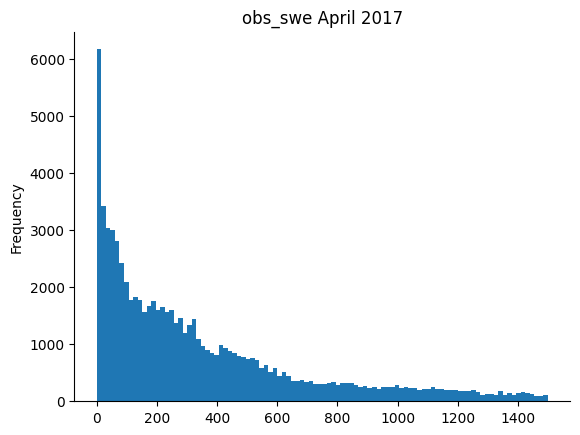

In [149]:
from matplotlib import pyplot as plt
pillow_data[(pillow_data["obs_swe"] > 0) & (pillow_data['obs_swe'] < 1500)]["obs_swe"].plot(kind='hist', bins=100, title='obs_swe April 2017')
plt.gca().spines[['top', 'right',]].set_visible(False)

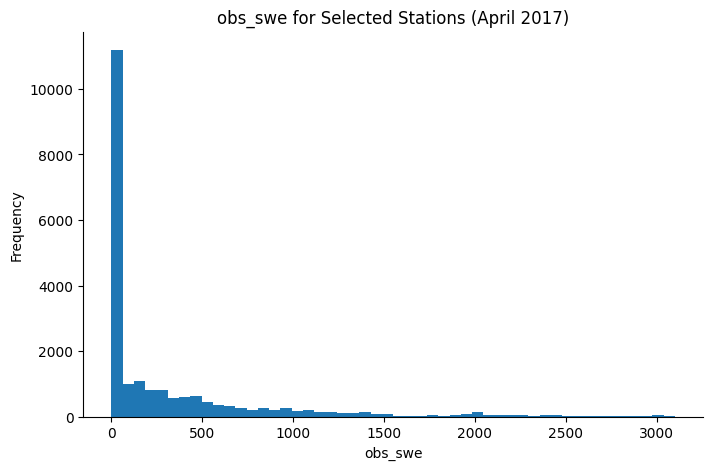

In [152]:
# Filter for the selected acronyms
filtered_data = pillow_data[pillow_data["pillow"].isin(["DAN", "GNL", "LLE", "LMS", "SPA"])]
fildered_data = filtered_data[(filtered_data["obs_swe"] > 0) & (filtered_data['obs_swe'] < 1500)]

# Plot histogram
plt.figure(figsize=(8, 5))
filtered_data["obs_swe"].plot(kind="hist", bins=50, title="obs_swe for Selected Stations (April 2017)")

# Style adjustments
plt.xlabel("obs_swe")
plt.ylabel("Frequency")
plt.gca().spines[["top", "right"]].set_visible(False)

plt.show()

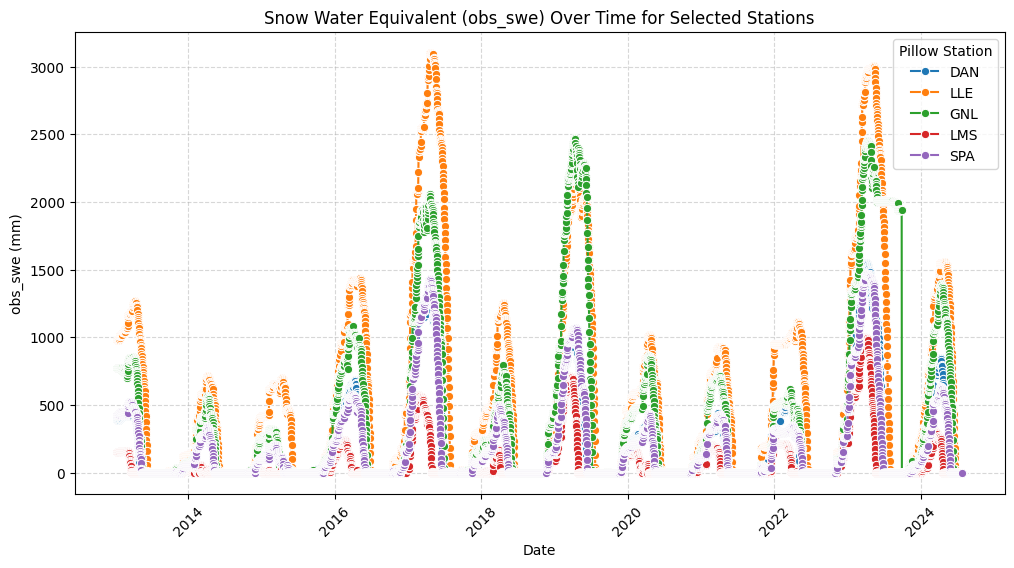

In [153]:
import seaborn as sns

# Filter for selected stations
selected_stations = ["DAN", "GNL", "LLE", "LMS", "SPA"]
filtered_data = pillow_data[pillow_data["pillow"].isin(selected_stations)]

# Plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x="time", y="obs_swe", hue="pillow", marker="o")

# Labels & Style
plt.title("Snow Water Equivalent (obs_swe) Over Time for Selected Stations")
plt.xlabel("Date")
plt.ylabel("obs_swe (mm)")
plt.legend(title="Pillow Station")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.show()


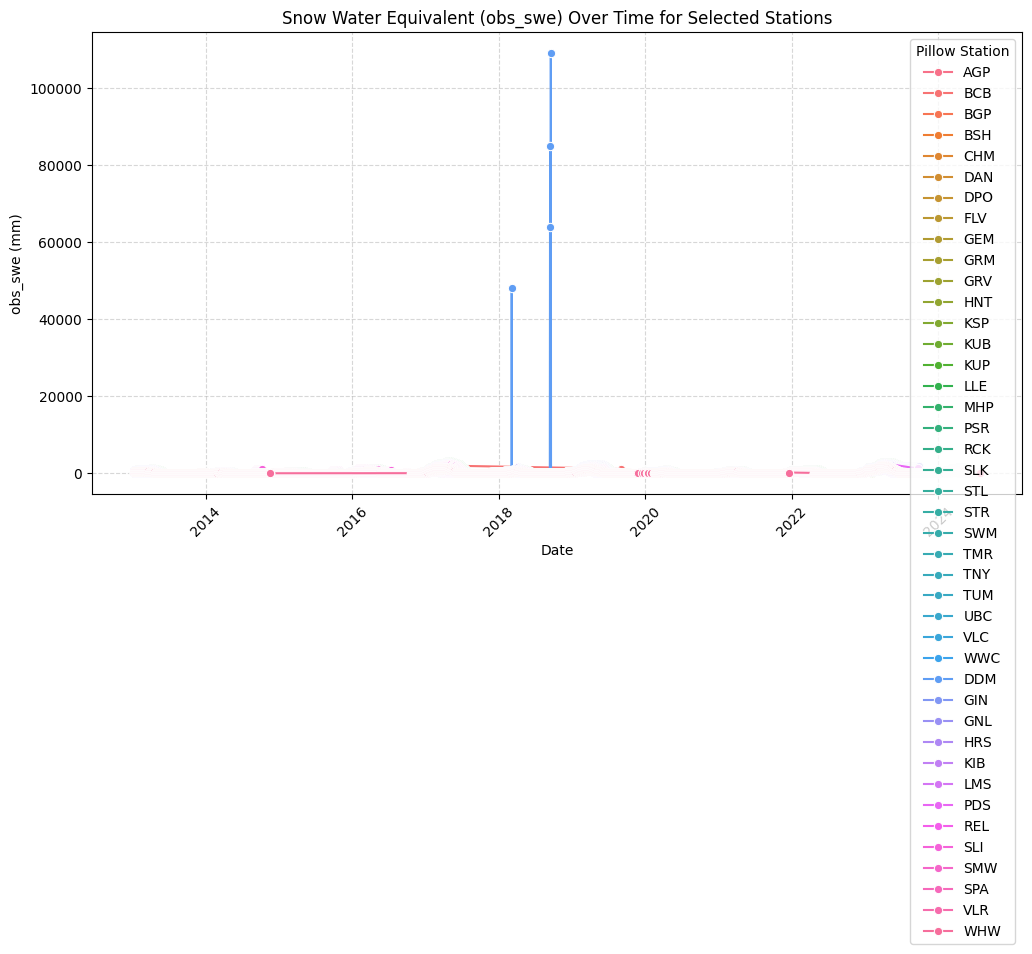

In [154]:
# Plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=pillow_data, x="time", y="obs_swe", hue="pillow", marker="o")

# Labels & Style
plt.title("Snow Water Equivalent (obs_swe) Over Time for Selected Stations")
plt.xlabel("Date")
plt.ylabel("obs_swe (mm)")
plt.legend(title="Pillow Station")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.show()

<ipython-input-155-b85ce9c30d2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x="pillow", y="obs_swe", palette="coolwarm")


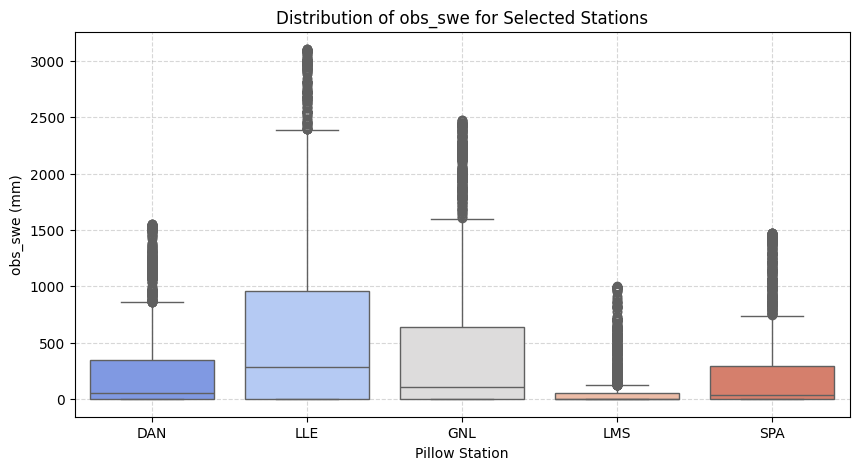

In [155]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_data, x="pillow", y="obs_swe", palette="coolwarm")

plt.title("Distribution of obs_swe for Selected Stations")
plt.xlabel("Pillow Station")
plt.ylabel("obs_swe (mm)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

<ipython-input-158-53e28f4a65f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pillow_data, x="pillow", y="obs_swe", palette="coolwarm")


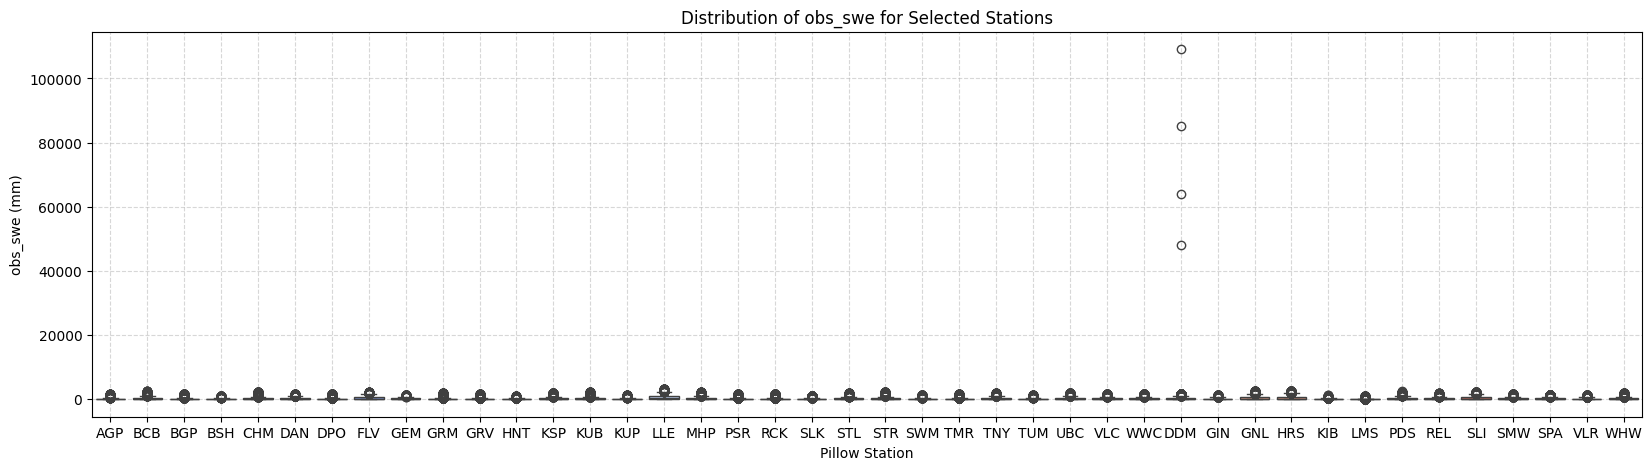

In [158]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=pillow_data, x="pillow", y="obs_swe", palette="coolwarm")

plt.title("Distribution of obs_swe for Selected Stations")
plt.xlabel("Pillow Station")
plt.ylabel("obs_swe (mm)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

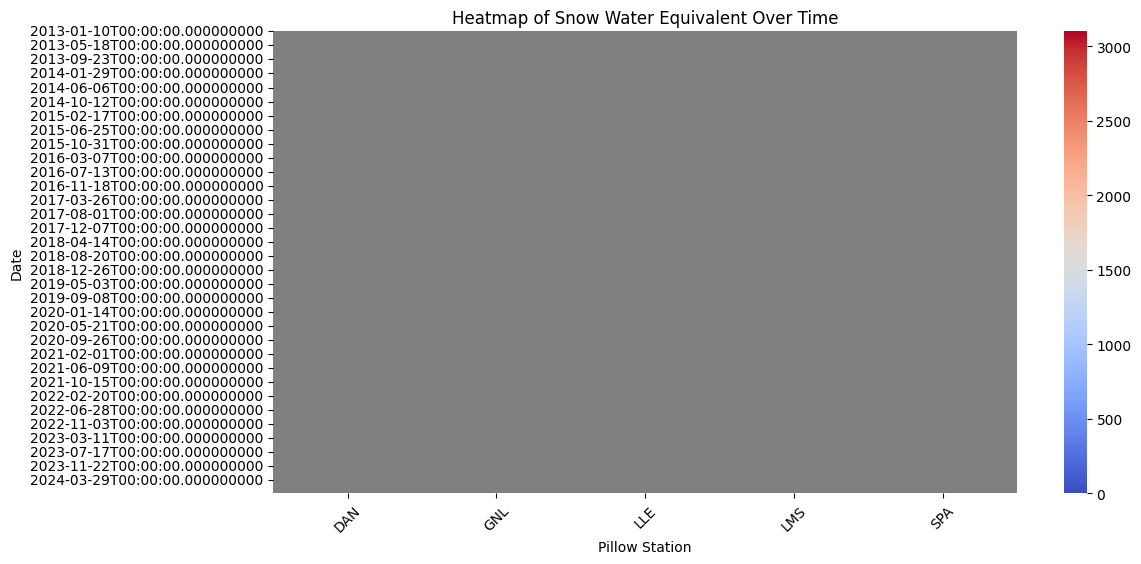

In [159]:
# Pivot table for heatmap
pivot_data = filtered_data.pivot(index="time", columns="pillow", values="obs_swe")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="coolwarm", linewidths=0.5, linecolor="gray", annot=False)

plt.title("Heatmap of Snow Water Equivalent Over Time")
plt.xlabel("Pillow Station")
plt.ylabel("Date")
plt.xticks(rotation=45)
plt.show()

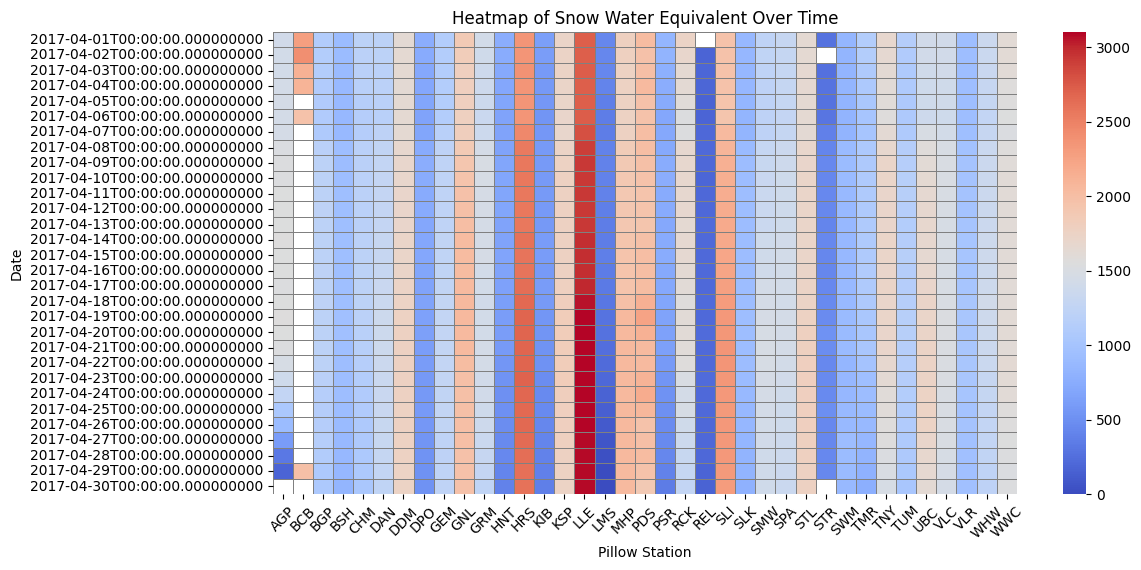

In [ ]:
# Pivot table for heatmap
pivot_data = pillow_data.pivot(index="time", columns="pillow", values="obs_swe")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="coolwarm", linewidths=0.5, linecolor="gray", annot=False)

plt.title("Heatmap of Snow Water Equivalent Over Time")
plt.xlabel("Pillow Station")
plt.ylabel("Date")
plt.xticks(rotation=45)
plt.show()

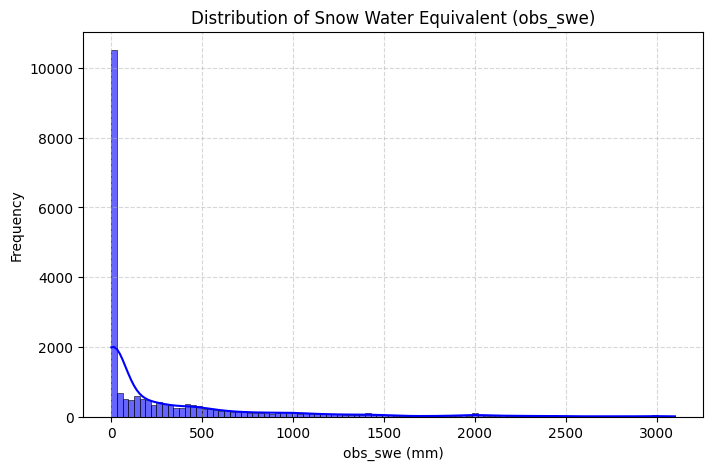

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(filtered_data["obs_swe"], bins=100, kde=True, color="blue", alpha=0.6)

plt.title("Distribution of Snow Water Equivalent (obs_swe)")
plt.xlabel("obs_swe (mm)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [168]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21005 entries, 885179 to 7081197
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     21005 non-null  datetime64[ns]
 1   lat      21005 non-null  float64       
 2   lon      21005 non-null  float64       
 3   pillow   21005 non-null  object        
 4   obs_swe  21005 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 984.6+ KB


In [ ]:
import xarray as xr
ds = xr.open_dataset("/content/drive/MyDrive/Colab Notebooks/MoData/insitu/LLE.nc")


In [ ]:
ds_df = ds.to_dataframe()

In [ ]:
pillow_data[pillow_data.LLE.notna()].LLE

time        y         x          
2017-04-01  38.27594  -119.612808    2720.34
2017-04-02  38.27594  -119.612808    2720.34
2017-04-03  38.27594  -119.612808    2735.58
2017-04-04  38.27594  -119.612808    2720.34
2017-04-05  38.27594  -119.612808    2720.34
2017-04-06  38.27594  -119.612808    2730.50
2017-04-07  38.27594  -119.612808    2804.16
2017-04-08  38.27594  -119.612808    2903.22
2017-04-09  38.27594  -119.612808    2923.54
2017-04-10  38.27594  -119.612808    2923.54
2017-04-11  38.27594  -119.612808    2923.54
2017-04-12  38.27594  -119.612808    2923.54
2017-04-13  38.27594  -119.612808    2928.62
2017-04-14  38.27594  -119.612808    2974.34
2017-04-15  38.27594  -119.612808    2974.34
2017-04-16  38.27594  -119.612808    2974.34
2017-04-17  38.27594  -119.612808    3002.28
2017-04-18  38.27594  -119.612808    3055.62
2017-04-19  38.27594  -119.612808    3093.72
2017-04-20  38.27594  -119.612808    3101.34
2017-04-21  38.27594  -119.612808    3101.34
2017-04-22  38.27594  -119.612808    3101.34
2017-04-23  38.27594  -119.612808    3098.80
2017-04-24  38.27594  -119.612808    3096.26
2017-04-25  38.27594  -119.612808    3096.26
2017-04-26  38.27594  -119.612808    3091.18
2017-04-27  38.27594  -119.612808    3086.10
2017-04-28  38.27594  -119.612808    3086.10
2017-04-29  38.27594  -119.612808    3086.10
2017-04-30  38.27594  -119.612808    3086.10
Name: LLE, dtype: float64

In [ ]:
ds_df

LLE
time              
2012-10-01    0.00
2012-10-02    0.00
2012-10-03    0.00
2012-10-04    0.00
2012-10-05    0.00
...            ...
2024-12-30  482.60
2024-12-31  482.60
2025-01-01  482.60
2025-01-02  492.76
2025-01-03  492.76

[4478 rows x 1 columns]

In [178]:
from sklearn.metrics.pairwise import cosine_similarity

# Pivot to get a time-series matrix (stations as columns)
pivot_df = filtered_data.pivot(index="time", columns="pillow", values="obs_swe")

# Drop NaN values (if needed, fill missing values instead)
pivot_df = pivot_df.dropna()

In [179]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4149 entries, 2013-01-10 to 2024-07-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DAN     4149 non-null   float64
 1   GNL     4149 non-null   float64
 2   LLE     4149 non-null   float64
 3   LMS     4149 non-null   float64
 4   SPA     4149 non-null   float64
dtypes: float64(5)
memory usage: 194.5 KB


In [180]:
# Compute cosine similarity between station SWE time series
cosine_sim_matrix = cosine_similarity(pivot_df.T)

# Convert to DataFrame for readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=pivot_df.columns, columns=pivot_df.columns)

# Display the similarity matrix
from IPython.display import display
display(cosine_sim_df)

pillow       DAN       GNL       LLE       LMS       SPA
pillow                                                  
DAN     1.000000  0.872922  0.928230  0.834791  0.986623
GNL     0.872922  1.000000  0.898663  0.710169  0.881089
LLE     0.928230  0.898663  1.000000  0.698269  0.927483
LMS     0.834791  0.710169  0.698269  1.000000  0.829539
SPA     0.986623  0.881089  0.927483  0.829539  1.000000

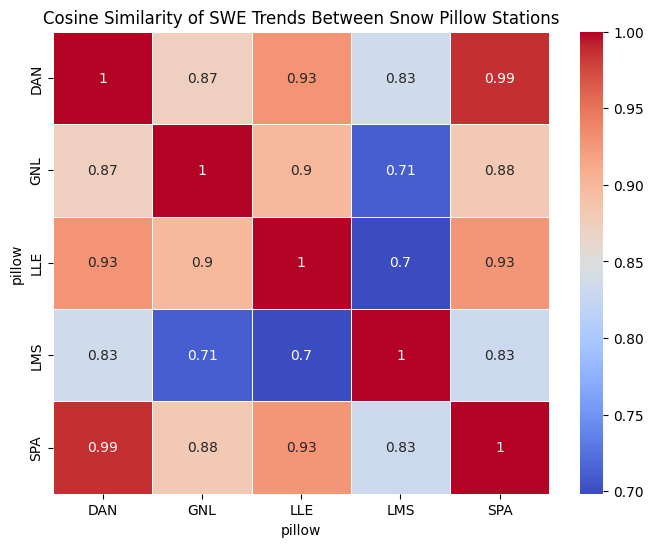

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Cosine Similarity of SWE Trends Between Snow Pillow Stations")
plt.show()

In [184]:
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-linux_x86_64.whl size=542096 sha256=8a9f449ad9b4b8205b9f2195869458d917f20327e36a1735e34fbaf1b4e86dce
  Stored in directory: /root/.cache/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw


In [187]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Select two stations for comparison
station1 = filtered_data[filtered_data["pillow"] == "TUM"].set_index("time")["obs_swe"].dropna()
station2 = filtered_data[filtered_data["pillow"] == "LLE"].set_index("time")["obs_swe"].dropna()

# Compute DTW distance
distance, _ = fastdtw(station1, station2, dist=euclidean)
print(f"DTW Distance between TUM and DAN: {distance}")

DTW Distance between TUM and DAN: 0.0


In [197]:
from sklearn.cluster import KMeans

# Prepare data for clustering
pivot_df = filtered_data.pivot(index="time", columns="pillow", values="obs_swe").fillna(0).T

# Run K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pivot_df["Cluster"] = kmeans.fit_predict(pivot_df)

# Show cluster assignments
print(pivot_df[["Cluster"]])

time    Cluster
pillow         
DAN           1
GNL           0
LLE           2
LMS           1
SPA           1


In [200]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, DAN to SPA
Columns: 4216 entries, 2013-01-10 00:00:00 to Cluster
dtypes: float64(4215), int32(1)
memory usage: 164.9+ KB


In [199]:
import geopandas as gpd
import pandas as pd

# Load station locations (ensure you have lat/lon data)
station_locations = pillow_data.groupby("pillow")[["x", "y"]].mean().reset_index()

# Merge cluster assignments
station_locations = station_locations.merge(pivot_df.reset_index(), left_on="pillow", right_on="pillow")

# Plot using geopandas
gdf = gpd.GeoDataFrame(station_locations, geometry=gpd.points_from_xy(station_locations["x"], station_locations["y"]))

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(column="Cluster", cmap="tab10", legend=True, ax=ax, markersize=100)

plt.title("Geographic Distribution of Snow Pillow Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


KeyError: "Columns not found: 'y', 'x'"

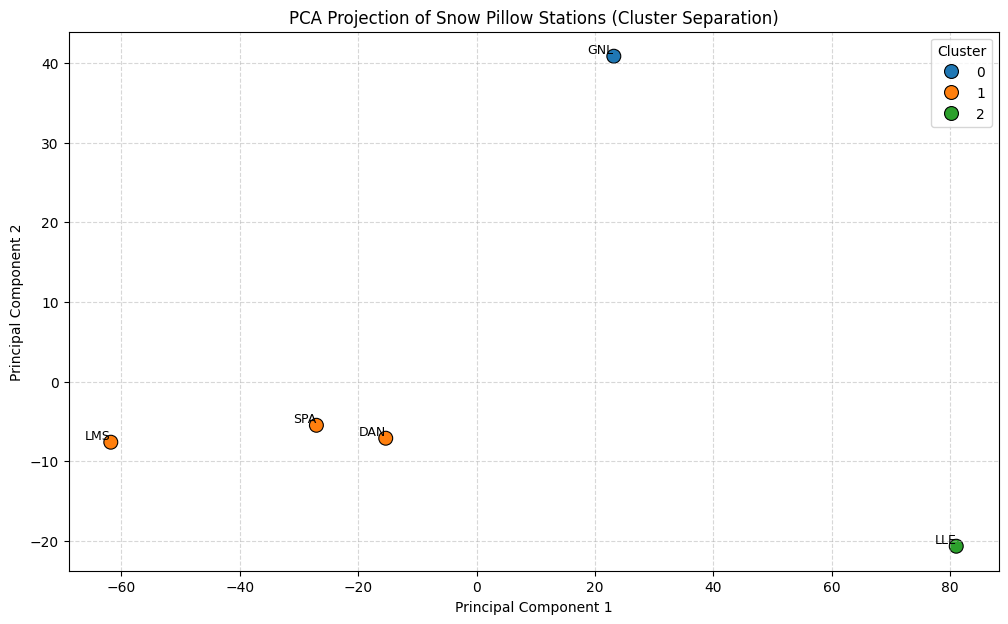

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming pivot_df is available and correctly structured

# Extracting the feature data (excluding the 'Cluster' column)
features = pivot_df.drop(columns=["Cluster"])

# Standardizing the data for PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)

# Creating a DataFrame for visualization
pca_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])
pca_df["Cluster"] = pivot_df["Cluster"].values
pca_df["Station"] = pivot_df.index

# Scatter plot for PCA clusters with labels
plt.figure(figsize=(12, 7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=100, edgecolor="black")

# Labeling each point with the station name
for i, row in pca_df.iterrows():
    plt.text(row["PC1"], row["PC2"], row["Station"], fontsize=9, ha='right', va='bottom')

plt.title("PCA Projection of Snow Pillow Stations (Cluster Separation)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


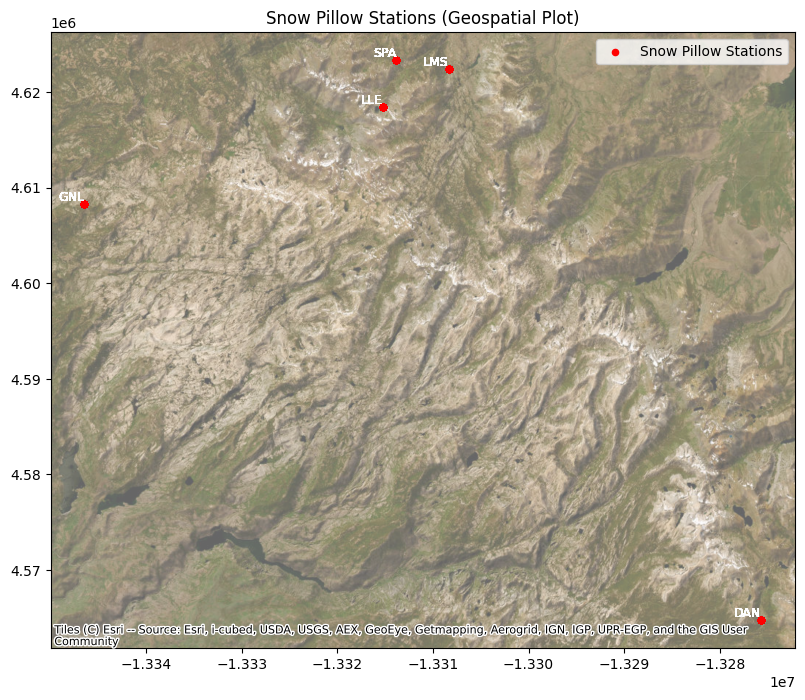

In [209]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Assuming filtered_data contains latitude, longitude, and station names
obs_gdf = gpd.GeoDataFrame(
    filtered_data,
    geometry=gpd.points_from_xy(filtered_data["lon"], filtered_data["lat"]),
    crs="EPSG:4326"
)

# Ensure CRS is correctly set
if obs_gdf.crs is None or obs_gdf.crs.to_string() != "EPSG:4326":
    obs_gdf = obs_gdf.to_crs(epsg=4326)

# Convert to Web Mercator (EPSG:3857) for mapping
obs_gdf = obs_gdf.to_crs(epsg=3857)

# Plot the observation points
fig, ax = plt.subplots(figsize=(12, 8))
obs_gdf.plot(ax=ax, color="red", markersize=20, label="Snow Pillow Stations")

# Label the stations
for _, row in obs_gdf.iterrows():
    ax.text(row.geometry.x, row.geometry.y, row["pillow"], fontsize=9, ha='right', va='bottom', color="white")

# Add basemap (satellite background)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, alpha=0.6)

# Customize plot
ax.set_title("Snow Pillow Stations (Geospatial Plot)")
ax.legend()

plt.show()



In [218]:
filtered_data[["lat", "lon", "pillow"]].value_counts()

lat        lon          pillow
38.275940  -119.612808  LLE       4215
38.310211  -119.600304  SPA       4215
38.303669  -119.551109  LMS       4215
38.204308  -119.893188  GNL       4208
37.896162  -119.257260  DAN       4152
Name: count, dtype: int64